In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt

from pycocotools.coco import COCO
from skimage.io import imread


In [2]:
data_dir = '../data'
data_types = ['train2017', 'val2017']

In [3]:
coco = None
image_ids = []
category_ids = []
data_type = ''
for data_type in data_types:
    annotation_file = '{}/raw/annotations/instances_{}.json'.format(data_dir, data_type)
    coco = COCO(annotation_file)
    category_ids = coco.getCatIds(supNms=['person','vehicle'])
    image_ids = [i for c in category_ids for i in coco.getImgIds(catIds=[c])]
    print('{} images from {} belong to supercategories person or vehicle'.format(len(image_ids), data_type))
    output_file = '{}/processed/image_ids_{}.txt'.format(data_dir, data_type)
    with open(output_file, 'w') as f_out:
        f_out.writelines(map(lambda x: str(x) + '\n', sorted(image_ids)))
    

loading annotations into memory...
Done (t=16.74s)
creating index...
index created!
102798 images from train2017 belong to supercategories person or vehicle
loading annotations into memory...
Done (t=0.58s)
creating index...
index created!
4350 images from val2017 belong to supercategories person or vehicle


In [4]:
image_id = 393226
image_info = coco.loadImgs([image_id])[0]
print(json.dumps(image_info, indent=4, sort_keys=True))

{
    "coco_url": "http://images.cocodataset.org/val2017/000000393226.jpg",
    "date_captured": "2013-11-17 20:36:07",
    "file_name": "000000393226.jpg",
    "flickr_url": "http://farm9.staticflickr.com/8003/7321339838_42fe225709_z.jpg",
    "height": 480,
    "id": 393226,
    "license": 4,
    "width": 640
}


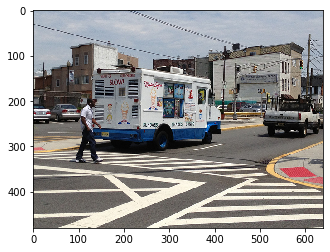

In [5]:
image = imread('{}/raw/images/{}/{}'.format(data_dir, data_type, image_info['file_name']))
plt.imshow(image)

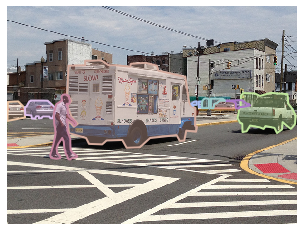

In [6]:
plt.imshow(image)
plt.axis('off')
annotation_ids = coco.getAnnIds(imgIds=[image_id], catIds=category_ids, iscrowd=None)
annotations = coco.loadAnns(annotation_ids)
coco.showAnns(annotations)
